As a Fitness Coach/Certified Personal Trainer, I'm all too aware of the misconception of how effective bodyweight exercises are to maintain healthy weight. This experiment attempts to highlight the benefits of a special movement I call KMBAs(for personal reasons). Please find below a general list of used Python libraries. The cell execution count reflects the addition of the r2_score after the linear regression plot.

In [15]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score


9 sets of 10 Burpees(KMBAs) performed at different times of the day, for 31 consecutive days, monitoring blood pressure before and after the exercise, pulse rate, and duration for performing this calisthenic movement reputed to be one of the most efficient for maintaining fitness goals.

In [3]:
kinesthetics = "90_KMBAs"
Kinesthetics = pd.read_csv("90_KMBAs.csv", encoding = 'unicode_escape')

A snapshot of the first 5 rows of the dataframe, revealing missing values.

In [4]:
Kinesthetics.head()

,Day,Pre 90 KMBAs Systolic,Pre 90 KMBAs Diastolic,Pre 90 KMBAs Pulse,Post 90 KMBAs Systolic,Post 90 KMBAs Diastolic,Post 90 KMBAs Pulse,Clock Time,Hour of Day
0,1,133,83,53,141,84,68,NaN,AM
1,2,132,79,51,130,84,75,NaN,AM
2,3,135,73,51,144,86,70,NaN,AM
3,4,128,78,57,130,80,65,18:00,AM
4,5,136,78,50,131,85,69,14:59,PM


An overview of the entire dataset, showing areas that need cleaning/preprocessing.

In [5]:
Kinesthetics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Day                      31 non-null     int64 
 1   Pre 90 KMBAs Systolic    31 non-null     int64 
 2   Pre 90 KMBAs Diastolic   31 non-null     int64 
 3   Pre 90 KMBAs Pulse       31 non-null     int64 
 4   Post 90 KMBAs Systolic   31 non-null     int64 
 5   Post 90 KMBAs Diastolic  31 non-null     int64 
 6   Post 90 KMBAs Pulse      31 non-null     int64 
 7   Clock Time               27 non-null     object
 8   Hour of Day              31 non-null     object
dtypes: int64(7), object(2)
memory usage: 2.3+ KB


Handling missing values to facilitate statistical analysis.

In [6]:
# Imputation of mean value for NaNs in "Clock Time" column
imputer = SimpleImputer(strategy = 'mean')
Kinesthetics['Clock Time'] = Kinesthetics['Clock Time'].fillna(Kinesthetics['Clock Time'].mode()[0])


print(Kinesthetics.head())


   Day  Pre 90 KMBAs Systolic  Pre 90 KMBAs Diastolic  Pre 90 KMBAs Pulse  \
0    1                    133                      83                  53   
1    2                    132                      79                  51   
2    3                    135                      73                  51   
3    4                    128                      78                  57   
4    5                    136                      78                  50   

   Post 90 KMBAs Systolic  Post 90 KMBAs Diastolic  Post 90 KMBAs Pulse  \
0                     141                       84                   68   
1                     130                       84                   75   
2                     144                       86                   70   
3                     130                       80                   65   
4                     131                       85                   69   

  Clock Time Hour of Day  
0      13:08          AM  
1      13:08          AM  
2    

Modifying the AM/PM values to numeric(1s and 0s).

In [7]:
# Binarization of "Hour of Day" column from AM/PM to 1/0
Kinesthetics['Hour of Day'] = Kinesthetics['Hour of Day'].apply(lambda x: 1 if x == 'AM' else 0)

# Print the updated dataset
print(Kinesthetics.head())

   Day  Pre 90 KMBAs Systolic  Pre 90 KMBAs Diastolic  Pre 90 KMBAs Pulse  \
0    1                    133                      83                  53   
1    2                    132                      79                  51   
2    3                    135                      73                  51   
3    4                    128                      78                  57   
4    5                    136                      78                  50   

   Post 90 KMBAs Systolic  Post 90 KMBAs Diastolic  Post 90 KMBAs Pulse  \
0                     141                       84                   68   
1                     130                       84                   75   
2                     144                       86                   70   
3                     130                       80                   65   
4                     131                       85                   69   

  Clock Time  Hour of Day  
0      13:08            1  
1      13:08            1  
2 

Modifying the minutes and seconds format, to seconds, in order for the Clock Time values to become integers for analysis.  

In [8]:
# Conversion of "Clock Time" column values to seconds
Kinesthetics['Clock Time'] = Kinesthetics['Clock Time'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))


print(Kinesthetics.head())

   Day  Pre 90 KMBAs Systolic  Pre 90 KMBAs Diastolic  Pre 90 KMBAs Pulse  \
0    1                    133                      83                  53   
1    2                    132                      79                  51   
2    3                    135                      73                  51   
3    4                    128                      78                  57   
4    5                    136                      78                  50   

   Post 90 KMBAs Systolic  Post 90 KMBAs Diastolic  Post 90 KMBAs Pulse  \
0                     141                       84                   68   
1                     130                       84                   75   
2                     144                       86                   70   
3                     130                       80                   65   
4                     131                       85                   69   

   Clock Time  Hour of Day  
0         788            1  
1         788            1  

Dataset is processed and ready for statistical analysis.

In [9]:
# Summary Statistics 
summary_stats = Kinesthetics.describe()  
print(summary_stats)

             Day  Pre 90 KMBAs Systolic  Pre 90 KMBAs Diastolic  \
count  31.000000              31.000000               31.000000   
mean   16.000000             133.548387               82.967742   
std     9.092121               5.909533                5.192840   
min     1.000000             124.000000               73.000000   
25%     8.500000             128.500000               79.000000   
50%    16.000000             134.000000               83.000000   
75%    23.500000             137.000000               85.000000   
max    31.000000             147.000000               96.000000   

       Pre 90 KMBAs Pulse  Post 90 KMBAs Systolic  Post 90 KMBAs Diastolic  \
count           31.000000               31.000000                31.000000   
mean            54.516129              138.193548                86.580645   
std              6.114851                5.918442                 4.588204   
min             47.000000              126.000000                75.000000   
25%   

In [ ]:
The min to mean Clock Time values may be a function of optimal fitness when performing 90 KMBAs. 

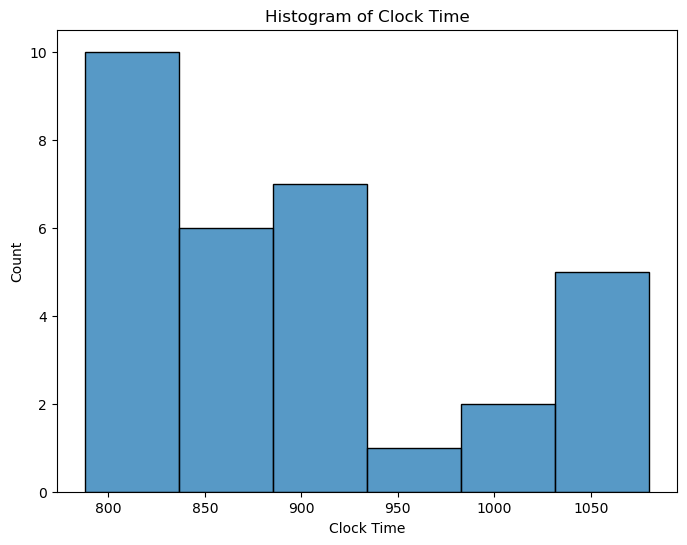

In [10]:
# Histogram of "Clock Time"
plt.figure(figsize = (8, 6))
sns.histplot(data = Kinesthetics, x = 'Clock Time')
plt.xlabel('Clock Time')
plt.ylabel('Count')
plt.title('Histogram of Clock Time')
plt.show()

In [ ]:
The Clock Times reflecting the highest count variability appears to be indicative of 
optimal (diastolic/"bottom number")blood pressure in high risk populations, and those
between the ages of 35 to 65. 
A look at the diastolic numbers close to 80 taken after performing 90 KMBAs 
are observed during the shorter periods of Clock Time. 

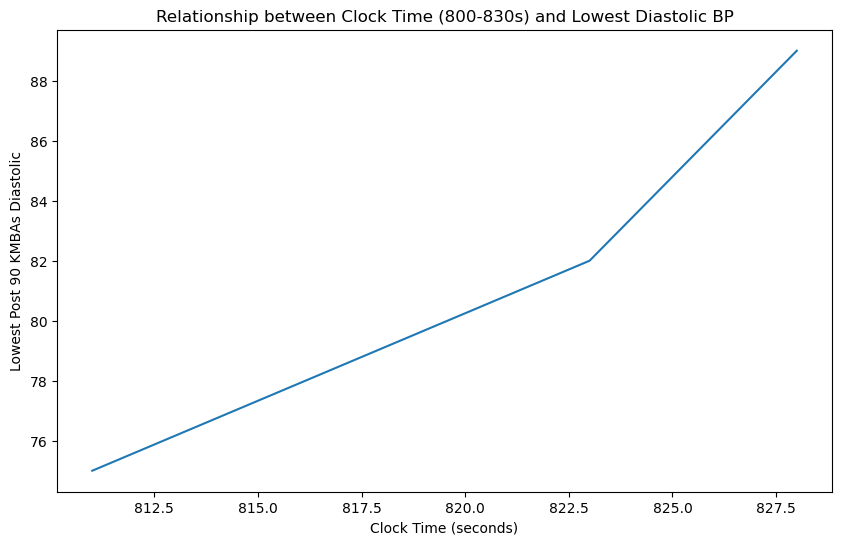

In [11]:
# Subsetting a dataset for Clock Times between 800 and 830 seconds
subset = Kinesthetics[(Kinesthetics['Clock Time'] >= 800) & (Kinesthetics['Clock Time'] <= 830)]

# Calculating minimum 'Post 90 KMBAs Diastolic' for this 'Clock Time' duration
min_diastolic = subset.groupby('Clock Time')['Post 90 KMBAs Diastolic'].min()

# Plotting the relationship
plt.figure(figsize=(10, 6))
plt.plot(min_diastolic.index, min_diastolic.values)
plt.xlabel('Clock Time (seconds)')
plt.ylabel('Lowest Post 90 KMBAs Diastolic')
plt.title('Relationship between Clock Time (800-830s) and Lowest Diastolic BP')
plt.show()


In [ ]:
To gather comprehensive trends/patterns in the dataset, a heatmap reveals the highest evidence of the link between
Pre 90 KMBAs Diastolic and Post 90 KMBAs Diastolic. A 60% likelihood that with every 90 repetitions one can maintain
optimal blood pressure and Pulse rate, which presents at 59% for Pre and Post 90 KMBAs Pulse readings.

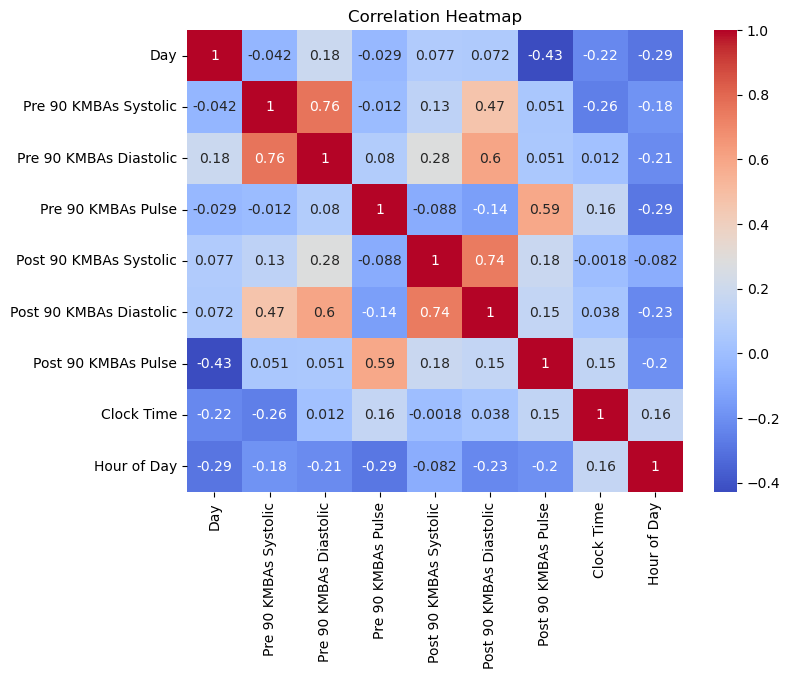

In [12]:
# Correlation Analysis and Heatmap
correlation_matrix = Kinesthetics.corr()  #Calculating the correlation matrix
plt.figure(figsize = (8, 6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
My hypothesis considered what the relative impact would be on diastolic blood pressure before and after performing
90 KMBAs. How significant the numbers would vary and whether or not an improvement could occur. 
Ultimately, I wanted to build a regression model that could predict the optimal number of KMBAs to perform daily
in order to maintain efficent cardiovascular/aerobic fitness. 

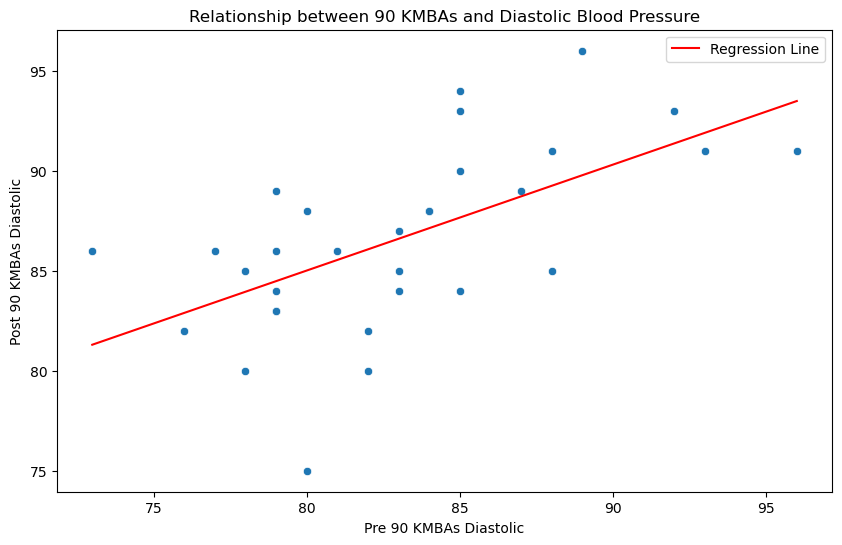

In [13]:
# Data Visualization
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Pre 90 KMBAs Diastolic', y = 'Post 90 KMBAs Diastolic', data = Kinesthetics)

# Linear regression model
coefficients = np.polyfit(Kinesthetics['Pre 90 KMBAs Diastolic'], Kinesthetics['Post 90 KMBAs Diastolic'], 1)
intercept = coefficients[1]
slope = coefficients[0]

# Extrapolation
extrapolation_x = np.array([np.min(Kinesthetics['Pre 90 KMBAs Diastolic']), np.max(Kinesthetics['Pre 90 KMBAs Diastolic'])])
extrapolation_y = slope * extrapolation_x + intercept

# Regression line
plt.plot(extrapolation_x, extrapolation_y, color = 'red', label = 'Regression Line')

plt.xlabel('Pre 90 KMBAs Diastolic')
plt.ylabel('Post 90 KMBAs Diastolic')
plt.title('Relationship between 90 KMBAs and Diastolic Blood Pressure')
plt.legend()
plt.show()


In [16]:
# Compute R-squared value
y_true = Kinesthetics['Post 90 KMBAs Diastolic']
y_pred = slope * Kinesthetics['Pre 90 KMBAs Diastolic'] + intercept
r2 = r2_score(y_true, y_pred)

print("R-squared:", r2)


R-squared: 0.3595234925465478


In [ ]:
In this model, attempting to predict optimal diastolic blood pressure, I used Pre 90 KMBAs Diastolic (x-variable)
as the independent feature against the blood pressure reading after the 90 KMBAs(Post, y-variable), the dependent feature. 

The resultant R-squared value of approximately 35.95% of the variance in the dependent feature (Post 90 KMBAs Diastolic) 
is explained by the independent feature (Pre 90 KMBAs Diastolic).

R-squared values range from 0 to 1, where 1 represents a perfect fit and 0 indicates that the model does not explain
any of the variance. In this scenario, the R-squared value of 0.3595 implies a moderate (nonetheless, promising)
level of predictive power for predicting the Post 90 KMBAs Diastolic values based on the Pre 90 KMBAs Diastolic values.

To be fair, it is important to keep in mind the limitations associated with this relatively small dataset. Hence I am
considering further experimentation with longer than the 31 days of observation, and other features than currently used. 
